<a href="https://colab.research.google.com/github/sooo19/A-study-of-the-data-generation-model-of-the-Folk-Painting-source-data/blob/main/0127_DeepLabV3%2B_Train_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Colab_Gdrive 연동
from google.colab import drive 
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [3]:
import tensorflow as tf
tf.__version__

'1.15.2'

In [4]:
!mkdir -p /content/gdrive/MyDrive/deeplabmodels/

In [5]:
import os
from os.path import expanduser
import tensorflow as tf 
from io import BytesIO
import tarfile
import tempfile
from six.moves import urllib

home = expanduser("~")
os.chdir(home)

In [15]:
# if not (os.path.exists('''models''')):
# git clone https://github.com/tensorflow/models.git /content/gdrive/MyDrive/deeplabmodels/

In [16]:
cd /content/gdrive/MyDrive/deeplabmodels

/content/gdrive/MyDrive/deeplabmodels


In [17]:
!git clone https://github.com/tensorflow/models.git /content/gdrive/MyDrive/deeplabmodels/

Cloning into '/content/gdrive/MyDrive/deeplabmodels'...
remote: Enumerating objects: 68544, done.
remote: Total 68544 (delta 0), reused 0 (delta 0), pack-reused 68544
Receiving objects: 100% (68544/68544), 576.96 MiB | 16.66 MiB/s, done.
Resolving deltas: 100% (48300/48300), done.
Checking out files: 100% (2861/2861), done.


In [18]:
!ls

AUTHORS     community	     ISSUES.md	official  README.md  tensorflow_models
CODEOWNERS  CONTRIBUTING.md  LICENSE	orbit	  research


# 실행

In [ ]:
#Colab_Gdrive 연동
from google.colab import drive 
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [19]:
os.chdir('/content/gdrive/MyDrive/deeplabmodels'+'/research/')
!python slim/setup.py build
!python slim/setup.py install

running build
running build_py
creating build
creating build/lib
creating build/lib/adversarial_text
copying adversarial_text/__init__.py -> build/lib/adversarial_text
copying adversarial_text/adversarial_losses.py -> build/lib/adversarial_text
copying adversarial_text/evaluate.py -> build/lib/adversarial_text
copying adversarial_text/gen_data.py -> build/lib/adversarial_text
copying adversarial_text/gen_vocab.py -> build/lib/adversarial_text
copying adversarial_text/graphs.py -> build/lib/adversarial_text
copying adversarial_text/graphs_test.py -> build/lib/adversarial_text
copying adversarial_text/inputs.py -> build/lib/adversarial_text
copying adversarial_text/layers.py -> build/lib/adversarial_text
copying adversarial_text/pretrain.py -> build/lib/adversarial_text
copying adversarial_text/train_classifier.py -> build/lib/adversarial_text
copying adversarial_text/train_utils.py -> build/lib/adversarial_text
creating build/lib/cognitive_planning
copying cognitive_planning/__init__.py

In [20]:
# os.chdir(home+'''/models/research/''')
os.chdir('/content/gdrive/MyDrive/deeplabmodels'+'/research/') #os.chdir('/content/gdrive/MyDrive/deeplabmodels'+'/research/')
!export PYTHONPATH=$PYTHONPATH:`pwd`:`pwd`/slim
!cp -r slim/* deeplab

In [21]:
# os.chdir(home+"/models/research/deeplab/datasets")
os.chdir('/content/gdrive/MyDrive/deeplabmodels'+'/research/deeplab/datasets')
!sh download_and_convert_voc2012.sh

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: voc2012/VOC2012/SegmentationClass/2008_004172.png  
  inflating: voc2012/VOC2012/SegmentationClass/2008_004175.png  
  inflating: voc2012/VOC2012/SegmentationClass/2008_004212.png  
  inflating: voc2012/VOC2012/SegmentationClass/2008_004259.png  
  inflating: voc2012/VOC2012/SegmentationClass/2008_004279.png  
  inflating: voc2012/VOC2012/SegmentationClass/2008_004321.png  
  inflating: voc2012/VOC2012/SegmentationClass/2008_004339.png  
  inflating: voc2012/VOC2012/SegmentationClass/2008_004345.png  
  inflating: voc2012/VOC2012/SegmentationClass/2008_004358.png  
  inflating: voc2012/VOC2012/SegmentationClass/2008_004363.png  
  inflating: voc2012/VOC2012/SegmentationClass/2008_004365.png  
  inflating: voc2012/VOC2012/SegmentationClass/2008_004367.png  
  inflating: voc2012/VOC2012/SegmentationClass/2008_004396.png  
  inflating: voc2012/VOC2012/SegmentationClass/2008_004399.png  
  inflating: voc2012/VOC2012/SegmentationClass/2008_00

In [22]:
!mkdir -p /content/gdrive/MyDrive/deeplabmodels/research/deeplab/datasets/pascal_voc_seg/init_models
!mkdir -p /content/gdrive/MyDrive/deeplabmodels/research/deeplab/datasets/pascal_voc_seg/exp/train_on_trainval_set/train
!mkdir -p /content/gdrive/MyDrive/deeplabmodels/research/deeplab/datasets/pascal_voc_seg/exp/train_on_trainval_set/eval
!mkdir -p /content/gdrive/MyDrive/deeplabmodels/research/deeplab/datasets/pascal_voc_seg/exp/train_on_trainval_set/vis
!mkdir -p /content/gdrive/MyDrive/deeplabmodels/research/deeplab/datasets/pascal_voc_seg/exp/train_on_trainval_set/export
os.chdir('/content/gdrive/MyDrive/deeplabmodels/research/deeplab/datasets/pascal_voc_seg/init_models')
!wget -nd -c "http://download.tensorflow.org/models/deeplabv3_pascal_train_aug_2018_01_04.tar.gz"
!tar -xf "deeplabv3_pascal_train_aug_2018_01_04.tar.gz"
os.chdir('/content/gdrive/MyDrive/deeplabmodels/research/')

--2022-01-26 15:43:12--  http://download.tensorflow.org/models/deeplabv3_pascal_train_aug_2018_01_04.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.199.128, 2607:f8b0:400e:c02::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.199.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 460058541 (439M) [application/x-tar]
Saving to: ‘deeplabv3_pascal_train_aug_2018_01_04.tar.gz’

deeplabv3_pascal_tr 100%[===================>] 438.75M  70.4MB/s    in 6.4s    

2022-01-26 15:43:19 (68.8 MB/s) - ‘deeplabv3_pascal_train_aug_2018_01_04.tar.gz’ saved [460058541/460058541]



In [23]:
!ls

adversarial_text    cvt_text	   lfads		  README.md
attention_ocr	    deeplab	   lstm_object_detection  rebar
audioset	    deep_speech    marco		  seq_flow_lite
autoaugment	    delf	   nst_blogpost		  slim
build		    dist	   object_detection	  slim.egg-info
cognitive_planning  efficient-hrl  pcl_rl		  vid2depth


In [24]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


folder_metadata = {
    'title' : 'train',
    # The mimetype defines this new file as a folder, so don't change this.
    'mimeType' : 'application/vnd.google-apps.folder'
}
file_list = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()
flag=0
for file1 in file_list:
    if file1['title'] == 'train':
        folder_id = file1['id']
        flag=1
if flag==0:
  folder = drive.CreateFile(folder_metadata)
  folder.Upload()
  folder_title = folder['title']
  folder_id = folder['id']



files = [f for f in os.listdir('.') if os.path.isfile(f)]
for f in files:
  file = drive.CreateFile({"parents": [{"kind": "drive#fileLink", "id": folder_id}]})
  print("uploading "+f)
  file.SetContentFile(f)
  file.Upload()

uploading README.md


In [25]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

folder_metadata = {
    'title' : 'train',
    # The mimetype defines this new file as a folder, so don't change this.
    'mimeType' : 'application/vnd.google-apps.folder'
}
file_list = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()
flag=0
for file1 in file_list:
    if file1['title'] == 'train':
        folder_id = file1['id']
        flag=1
if flag==0:
  folder = drive.CreateFile(folder_metadata)
  folder.Upload()
  folder_title = folder['title']
  folder_id = folder['id']


In [26]:
'''Remove all previous checkpoint and train files if exists '''
!rm -r  /content/gdrive/MyDrive/deeplabmodels/research/deeplab/datasets/pascal_voc_seg/exp/train_on_trainval_set/train/*
# /content/gdrive/MyDrive/deeplabmodels/research/deeplab/

rm: cannot remove '/content/gdrive/MyDrive/deeplabmodels/research/deeplab/datasets/pascal_voc_seg/exp/train_on_trainval_set/train/*': No such file or directory


In [27]:
!ls /content/gdrive/MyDrive/deeplabmodels/research/deeplab/datasets/pascal_voc_seg/exp/train_on_trainval_set/train/

In [28]:
os.chdir('/content/gdrive/MyDrive/deeplabmodels/research/deeplab/datasets/pascal_voc_seg/exp/train_on_trainval_set/train')
file_list = drive.ListFile({'q': "'{}' in parents and trashed=false".format(folder_id)}).GetList()
for file1 in sorted(file_list, key = lambda x: x['title']):
    file1.GetContentFile(file1['title'])

In [29]:
!python /content/gdrive/MyDrive/deeplabmodels/research/deeplab/train.py \
  --logtostderr \
  --train_split="trainval" \
  --model_variant="xception_65" \
  --atrous_rates=6 \
  --atrous_rates=12 \
  --atrous_rates=18 \
  --output_stride=16 \
  --decoder_output_stride=4 \
  --train_crop_size=1025 \
  --train_crop_size=1025 \
  --train_batch_size=1 \
  --training_number_of_steps=20 \
  --fine_tune_batch_norm=false \
  --tf_initial_checkpoint="/content/gdrive/MyDrive/deeplabmodels/research/deeplab/datasets/pascal_voc_seg/init_models/deeplabv3_pascal_train_aug/model.ckpt" \
  --train_logdir="/content/gdrive/MyDrive/deeplabmodels/research/deeplab/datasets/pascal_voc_seg/exp/train_on_trainval_set/train" \
  --dataset_dir="/content/gdrive/MyDrive/deeplabmodels/research/deeplab/datasets/pascal_voc_seg/tfrecord"


''' Delete All old train files in Google Drive and upload new ones'''
'''
os.chdir('/content/gdrive/MyDrive/deeplabmodels/research/deeplab/datasets/pascal_voc_seg/exp/train_on_trainval_set/train')
file_list = drive.ListFile({'q': "'{}' in parents and trashed=false".format(folder_id)}).GetList()
for file1 in sorted(file_list, key = lambda x: x['title']):
    file1.Delete() 
files = [f for f in os.listdir('.') if os.path.isfile(f)]
for f in files:
  file = drive.CreateFile({"parents": [{"kind": "drive#fileLink", "id": folder_id}]})
  print("uploading "+f)
  file.SetContentFile(f)
  file.Upload()
'''


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



W0126 15:52:19.406646 140110229026688 module_wrapper.py:139] From /content/gdrive/MyDrive/deeplabmodels/research/deeplab/train.py:274: The name tf.logging.set_verbosity is deprecated. Please use tf.compat.v1.logging.set_verbosity instead.


W0126 15:52:19.406841 140110229026688 module_wrapper.py:139] From /content/gdrive/MyDrive/deeplabmodels/research/deeplab/train.py:274: The name tf.logging.INFO is deprecated. Please use tf.compat.v1.logging.INFO instead.


W0126 15:52:19.407034 140110229026688 module_wrapper.py:139] From /content/gdrive/MyDrive/deeplabmodels/research/deeplab/train.py:289: The name tf.gfile.MakeDirs is depr

'\nos.chdir(\'/content/gdrive/MyDrive/deeplabmodels/research/deeplab/datasets/pascal_voc_seg/exp/train_on_trainval_set/train\')\nfile_list = drive.ListFile({\'q\': "\'{}\' in parents and trashed=false".format(folder_id)}).GetList()\nfor file1 in sorted(file_list, key = lambda x: x[\'title\']):\n    file1.Delete() \nfiles = [f for f in os.listdir(\'.\') if os.path.isfile(f)]\nfor f in files:\n  file = drive.CreateFile({"parents": [{"kind": "drive#fileLink", "id": folder_id}]})\n  print("uploading "+f)\n  file.SetContentFile(f)\n  file.Upload()\n'

In [30]:
''' Delete All old train files in Google Drive and upload new ones'''
os.chdir('/content/gdrive/MyDrive/deeplabmodels/research/deeplab/datasets/pascal_voc_seg/exp/train_on_trainval_set/train')
file_list = drive.ListFile({'q': "'{}' in parents and trashed=false".format(folder_id)}).GetList()
for file1 in sorted(file_list, key = lambda x: x['title']):
    file1.Delete() 
files = [f for f in os.listdir('.') if os.path.isfile(f)]
for f in files:
  file = drive.CreateFile({"parents": [{"kind": "drive#fileLink", "id": folder_id}]})
  print("uploading "+f)
  file.SetContentFile(f)
  file.Upload()

uploading README.md


In [31]:
!ls /content/gdrive/MyDrive/deeplabmodels/research/deeplab/datasets/pascal_voc_seg/exp/train_on_trainval_set/train/

README.md


In [32]:
!ls

README.md


In [33]:
tf.__version__

'1.15.2'

In [39]:
os.chdir('/content/gdrive/MyDrive/deeplabmodels/research/deeplab')
!python export_model.py \
  --logtostderr \
  --checkpoint_path="/content/gdrive/MyDrive/deeplabmodels/research/deeplab/datasets/pascal_voc_seg/init_models/deeplabv3_pascal_train_aug/model.ckpt" \
  --export_path="/content/gdrive/MyDrive/deeplabmodels/research/deeplab/frozen_inference_graph.pb" \
  --model_variant="xception_65" \
  --atrous_rates=6 \
  --atrous_rates=12 \
  --atrous_rates=18 \
  --output_stride=16 \
  --decoder_output_stride=4 \
  --num_classes=21 \
  --crop_size=1025 \
  --crop_size=1025 \
  --inference_scales=1.0

# #--checkpoint_path="/content/gdrive/MyDrive/deeplabmodels/research/deeplab/datasets/pascal_voc_seg/exp/train_on_trainval_set/train/model.ckpt-200" \


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



W0126 15:57:11.148724 140237561436032 module_wrapper.py:139] From export_model.py:117: The name tf.logging.set_verbosity is deprecated. Please use tf.compat.v1.logging.set_verbosity instead.


W0126 15:57:11.148929 140237561436032 module_wrapper.py:139] From export_model.py:117: The name tf.logging.INFO is deprecated. Please use tf.compat.v1.logging.INFO instead.


W0126 15:57:11.149110 140237561436032 module_wrapper.py:139] From export_model.py:118: The name tf.logging.info is deprecated. Please use tf.compat.v1.logging.info instead.

INFO:tensorflow:Prepare to export model to: /content/gdrive/MyDrive/deeplabmodels/research/

In [40]:
import os
from io import BytesIO
import tarfile
import tempfile
import tensorflow as tf
from six.moves import urllib

from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

from google.colab import files

## Sample 1

In [64]:
SAMPLE_IMAGE = files.upload()

Saving morando.jpg to morando.jpg


In [ ]:
#!pip install GraphDef
#!pip install _render_traceback_

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
The folder you are executing pip from can no longer be found.


In [42]:
!fusermount -u drive
!google-drive-ocamlfuse drive

fusermount: failed to unmount /content/gdrive/MyDrive/deeplabmodels/research/deeplab/drive: No such file or directory
/bin/bash: google-drive-ocamlfuse: command not found


In [90]:
INPUT_TENSOR_NAME = 'ImageTensor:0'
OUTPUT_TENSOR_NAME = 'SemanticPredictions:0'
INPUT_SIZE = 1025
FROZEN_GRAPH_NAME = 'frozen_inference_graph'

graph = tf.Graph()

graph_def = None

#file_1=open("/content/gdrive/MyDrive/deeplabmodels/research/deeplab/frozen_inference_graph.pb",'r')
#graph_def = tf.GraphDef.FromString(file_1.read())

graph_def = tf.GraphDef.FromString(open('/content/gdrive/MyDrive/deeplabmodels/research/deeplab/frozen_inference_graph.pb', 'rb').read())

if graph_def is None:
      raise RuntimeError('Cannot find inference graph.')
with graph.as_default():
      tf.import_graph_def(graph_def, name='')
sess = tf.Session(graph=graph)


def run(image):
    """Runs inference on a single image.

    Args:
      image: A PIL.Image object, raw input image.

    Returns:
      resized_image: RGB image resized from original input image.
      seg_map: Segmentation map of `resized_image`.
    """
    width, height = image.size
    resize_ratio = 1.0 * INPUT_SIZE / max(width, height)
    target_size = (int(resize_ratio * width), int(resize_ratio * height))
    resized_image = image.convert('RGB').resize(target_size, Image.ANTIALIAS)
    batch_seg_map = sess.run(
        OUTPUT_TENSOR_NAME,
        feed_dict={INPUT_TENSOR_NAME: [np.asarray(resized_image)]})
    seg_map = batch_seg_map[0]
    return resized_image, seg_map


In [89]:
print(SAMPLE_IMAGE)
# print(SAMPLE_IMAGE.keys())
#print(str(SAMPLE_IMAGE.keys()[0]))

# list(my_dict.keys())[0]

{'morando.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x03\x02\x02\x03\x02\x02\x03\x03\x03\x03\x04\x03\x03\x04\x05\x08\x05\x05\x04\x04\x05\n\x07\x07\x06\x08\x0c\n\x0c\x0c\x0b\n\x0b\x0b\r\x0e\x12\x10\r\x0e\x11\x0e\x0b\x0b\x10\x16\x10\x11\x13\x14\x15\x15\x15\x0c\x0f\x17\x18\x16\x14\x18\x12\x14\x15\x14\xff\xdb\x00C\x01\x03\x04\x04\x05\x04\x05\t\x05\x05\t\x14\r\x0b\r\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\xff\xc0\x00\x11\x08\x03 \x03 \x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1d\x00\x00\x01\x04\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x03\x05\x06\x01\x04\x07\x08\t\xff\xc4\x00I\x10\x00\x02\x01\x03\x03\x03\x02\x04\x04\x04\x04\x05\x03\x02\x01\r\x01\x02\x03\x00\x04\x11\x05\x12!\x061A\x13Q\x07"aq\x142\x81\x91\x08#B\xa1\x15\xb1\xc1\xf03Rb\xd1\xe1\x16$\xf1Cr\x82\t

In [77]:
for key in SAMPLE_IMAGE.keys():
    print(key, ":", SAMPLE_IMAGE[key])

print(list(SAMPLE_IMAGE.keys())[0])

morando.jpg : b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x03\x02\x02\x03\x02\x02\x03\x03\x03\x03\x04\x03\x03\x04\x05\x08\x05\x05\x04\x04\x05\n\x07\x07\x06\x08\x0c\n\x0c\x0c\x0b\n\x0b\x0b\r\x0e\x12\x10\r\x0e\x11\x0e\x0b\x0b\x10\x16\x10\x11\x13\x14\x15\x15\x15\x0c\x0f\x17\x18\x16\x14\x18\x12\x14\x15\x14\xff\xdb\x00C\x01\x03\x04\x04\x05\x04\x05\t\x05\x05\t\x14\r\x0b\r\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\xff\xc0\x00\x11\x08\x03 \x03 \x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1d\x00\x00\x01\x04\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x03\x05\x06\x01\x04\x07\x08\t\xff\xc4\x00I\x10\x00\x02\x01\x03\x03\x03\x02\x04\x04\x04\x04\x05\x03\x02\x01\r\x01\x02\x03\x00\x04\x11\x05\x12!\x061A\x13Q\x07"aq\x142\x81\x91\x08#B\xa1\x15\xb1\xc1\xf03Rb\xd1\xe1\x16$\xf1Cr\x82\t%4

In [88]:
# f = ('morando.jpg', 'r')
# print(f)
# jpeg_str = f.read()
# original_im = Image.open(BytesIO(jpeg_str))
# resized_im, seg_map = run(original_im)

#  함수 안 원래 코드
#   f = open(str(SAMPLE_IMAGE.keys()[0]),'r')
#   jpeg_str = f.read()
#   original_im = Image.open(BytesIO(jpeg_str))
#   resized_im, seg_map = run(original_im)
#   return resized_im, seg_map

In [92]:
import io
from PIL import Image

In [95]:
"""Inferences DeepLab model and visualizes result."""
def getImage(img):
    path = '/content/gdrive/MyDrive/deeplabmodels/research/deeplab/test_morando.jpg'
    with open(path, 'rb') as f:
        data = f.read()
    data_io = io.BytesIO(data)
    img = Image.open(data_io)
    resized_im, seg_map = run(img)
    return resized_im, seg_map

resized_im, seg_map=getImage(SAMPLE_IMAGE)

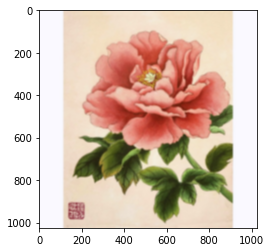

In [99]:
from google.colab.patches import cv2_imshow

blurImg = cv2.blur(np.asarray(resized_im),(10,10)) 
plt.imshow(blurImg)
rMap=resized_im.load()
portrait=blurImg
pMap=blurImg
cni=0
cnj=0

for i in range(resized_im.size[1]-1):
    for j in range(resized_im.size[0]-1):
      if not seg_map[i][j]==0:
        cni=i
        cnj=j
        pMap[i,j]=rMap[j,i]

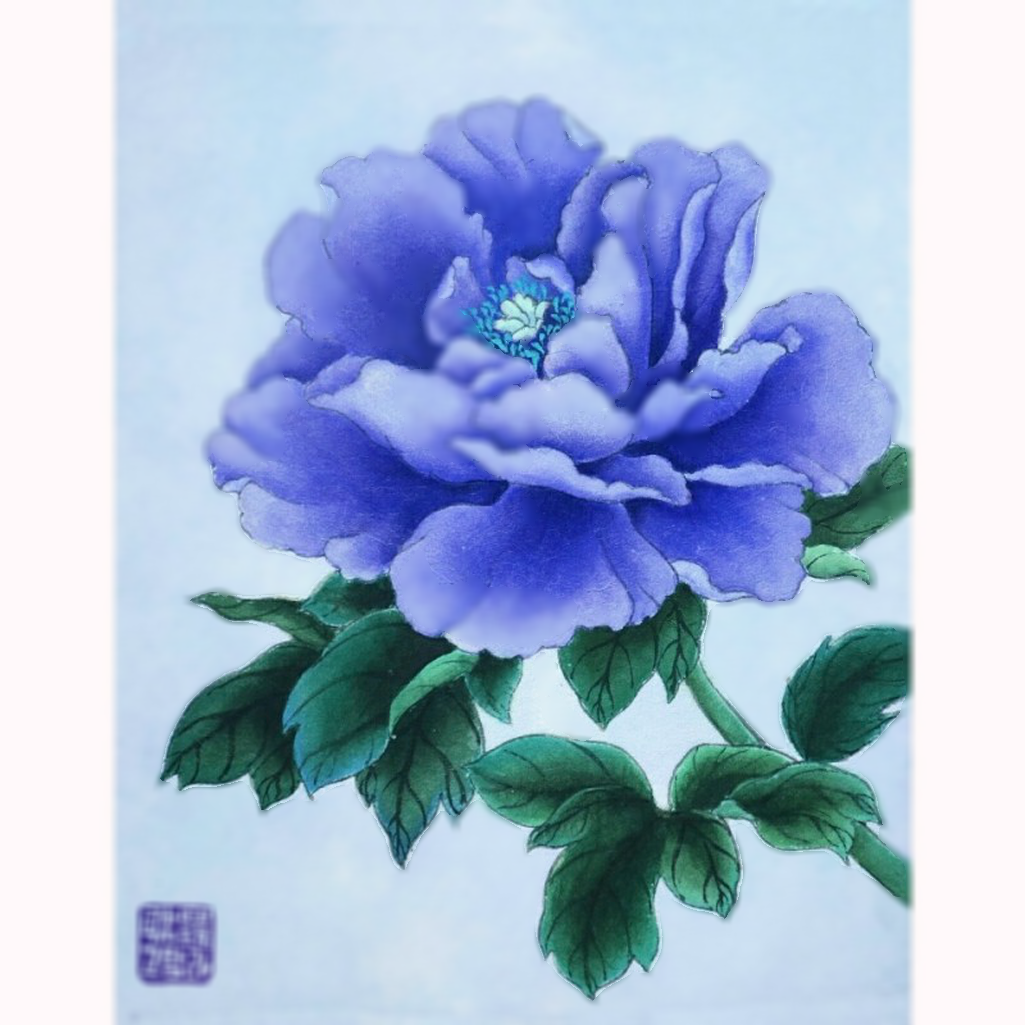

In [100]:
cv2_imshow(pMap)

## Sample2

In [101]:
# sample2: morando
SAMPLE_IMAGE = files.upload()

Saving PNY00009.PNG to PNY00009.PNG


In [102]:
import io
from PIL import Image

def getImage(img):
    path = '/content/gdrive/MyDrive/deeplabmodels/research/deeplab/test_PNY00009.PNG'
    with open(path, 'rb') as f:
        data = f.read()
    data_io = io.BytesIO(data)
    img = Image.open(data_io)
    resized_im, seg_map = run(img)
    return resized_im, seg_map

resized_im, seg_map=getImage(SAMPLE_IMAGE)

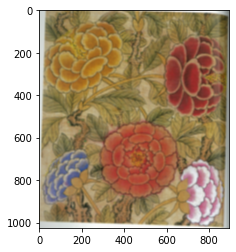

In [103]:
from google.colab.patches import cv2_imshow

blurImg = cv2.blur(np.asarray(resized_im),(10,10)) 
plt.imshow(blurImg)
rMap=resized_im.load()
portrait=blurImg
pMap=blurImg
cni=0
cnj=0

for i in range(resized_im.size[1]-1):
    for j in range(resized_im.size[0]-1):
      if not seg_map[i][j]==0:
        cni=i
        cnj=j
        pMap[i,j]=rMap[j,i]

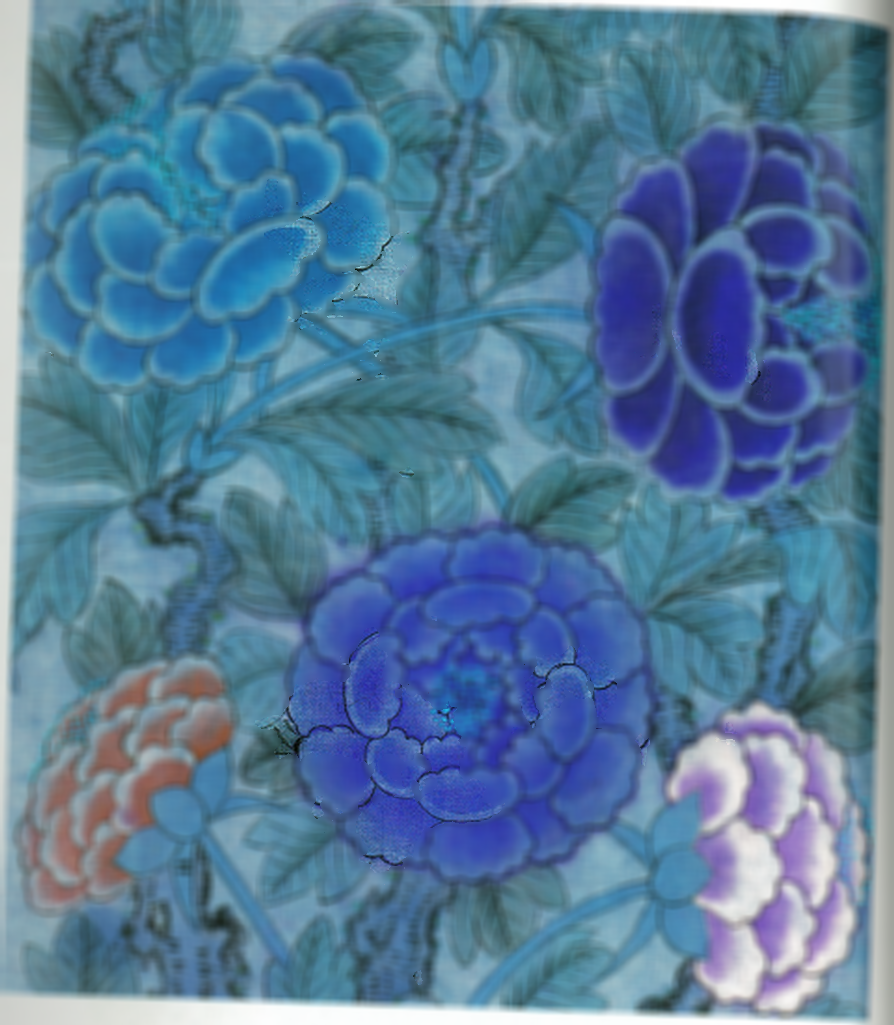

In [104]:
cv2_imshow(pMap)

## Sample 3

In [105]:
# sample3: real flower
SAMPLE_IMAGE = files.upload()

Saving flower.jfif to flower.jfif


In [106]:
import io
from PIL import Image

def getImage(img):
    path = '/content/gdrive/MyDrive/deeplabmodels/research/deeplab/test_flower.jfif'
    with open(path, 'rb') as f:
        data = f.read()
    data_io = io.BytesIO(data)
    img = Image.open(data_io)
    resized_im, seg_map = run(img)
    return resized_im, seg_map

resized_im, seg_map=getImage(SAMPLE_IMAGE)

In [110]:
print(resized_im)

<PIL.Image.Image image mode=RGB size=1025x682 at 0x7F79F28F12D0>


In [109]:
print(seg_map)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


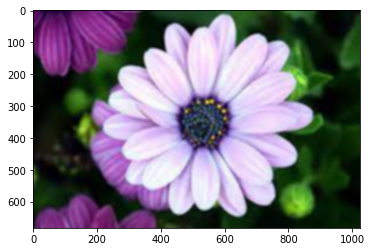

In [107]:
from google.colab.patches import cv2_imshow

blurImg = cv2.blur(np.asarray(resized_im),(10,10)) 
plt.imshow(blurImg) # 출력
rMap=resized_im.load()
portrait=blurImg
pMap=blurImg
cni=0
cnj=0

for i in range(resized_im.size[1]-1):
    for j in range(resized_im.size[0]-1):
      if not seg_map[i][j]==0:
        cni=i
        cnj=j
        pMap[i,j]=rMap[j,i]

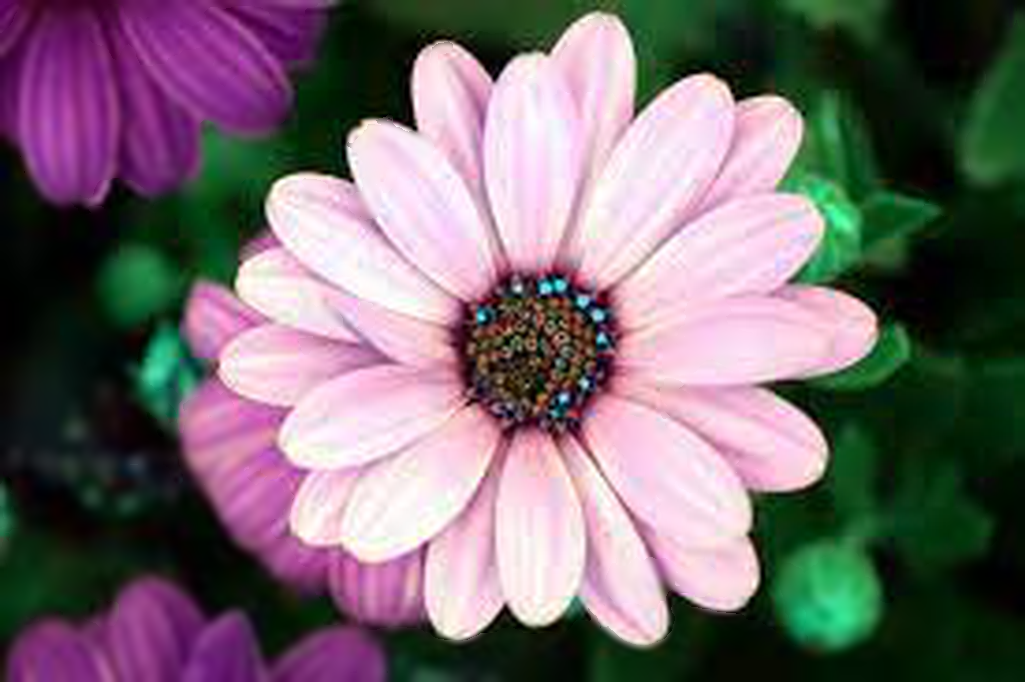

In [108]:
cv2_imshow(pMap)

## Sample 4


In [111]:
# sample3: real flower
SAMPLE_IMAGE = files.upload()

Saving PNY00026.PNG to PNY00026.PNG


In [112]:
import io
from PIL import Image

def getImage(img):
    path = '/content/gdrive/MyDrive/deeplabmodels/research/deeplab/test_PNY00026.PNG'
    with open(path, 'rb') as f:
        data = f.read()
    data_io = io.BytesIO(data)
    img = Image.open(data_io)
    resized_im, seg_map = run(img)
    return resized_im, seg_map

resized_im, seg_map=getImage(SAMPLE_IMAGE)

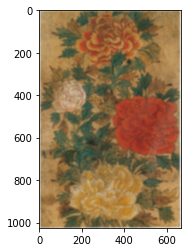

In [113]:
from google.colab.patches import cv2_imshow

blurImg = cv2.blur(np.asarray(resized_im),(10,10)) 
plt.imshow(blurImg) # 출력
rMap=resized_im.load()
portrait=blurImg
pMap=blurImg
cni=0
cnj=0

for i in range(resized_im.size[1]-1):
    for j in range(resized_im.size[0]-1):
      if not seg_map[i][j]==0:
        cni=i
        cnj=j
        pMap[i,j]=rMap[j,i]

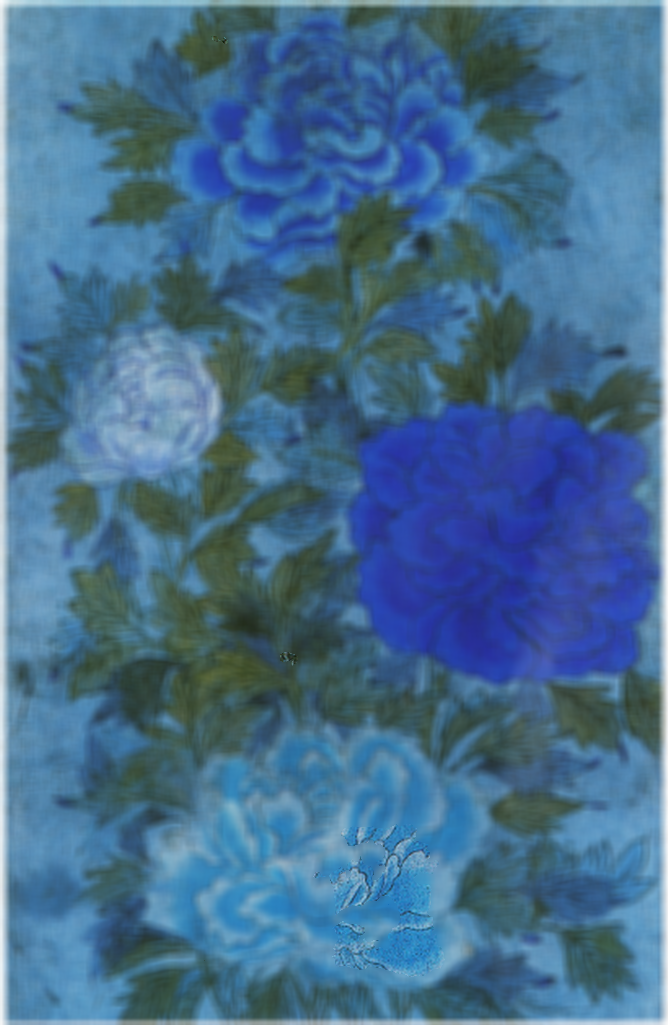

In [114]:
cv2_imshow(pMap)

## Sample 5

In [115]:
# sample3: real flower
SAMPLE_IMAGE = files.upload()


Saving PNY00011.PNG to PNY00011.PNG


In [116]:
import io
from PIL import Image

def getImage(img):
    path = '/content/gdrive/MyDrive/deeplabmodels/research/deeplab/test_PNY00011.PNG'
    with open(path, 'rb') as f:
        data = f.read()
    data_io = io.BytesIO(data)
    img = Image.open(data_io)
    resized_im, seg_map = run(img)
    return resized_im, seg_map

resized_im, seg_map=getImage(SAMPLE_IMAGE)


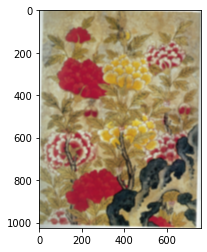

In [117]:
from google.colab.patches import cv2_imshow

blurImg = cv2.blur(np.asarray(resized_im),(10,10)) 
plt.imshow(blurImg) # 출력
rMap=resized_im.load()
portrait=blurImg
pMap=blurImg
cni=0
cnj=0

for i in range(resized_im.size[1]-1):
    for j in range(resized_im.size[0]-1):
      if not seg_map[i][j]==0:
        cni=i
        cnj=j
        pMap[i,j]=rMap[j,i]


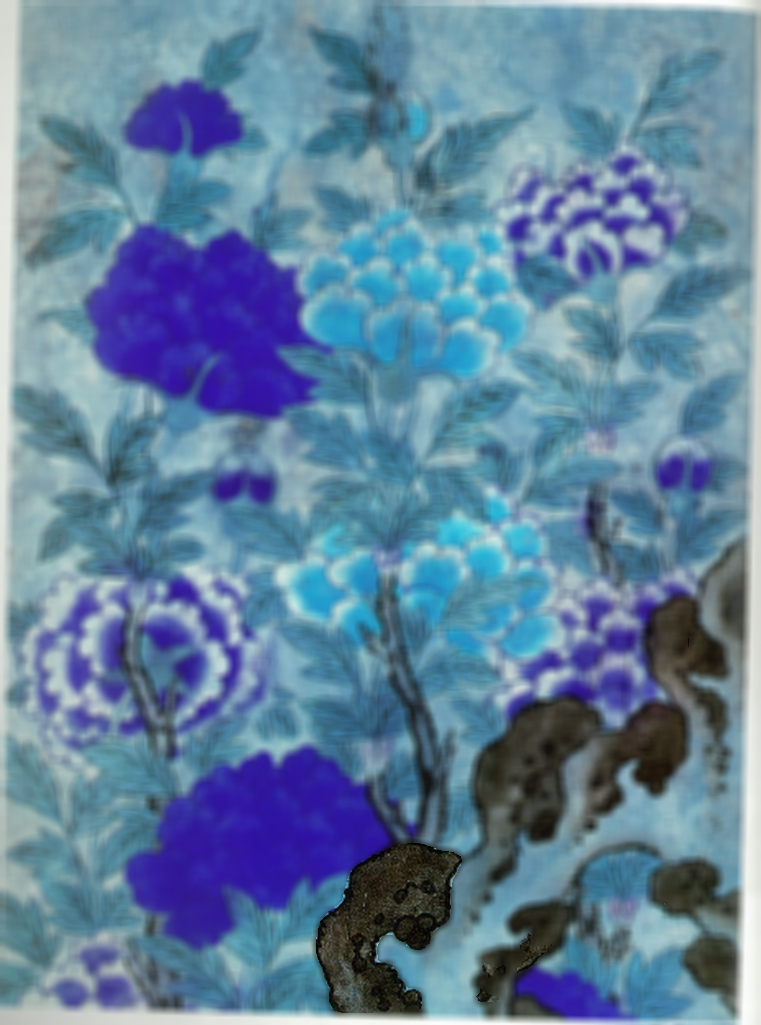

In [118]:
cv2_imshow(pMap)


## Sample 6

In [119]:
# sample3: real flower
SAMPLE_IMAGE = files.upload()


Saving tiger.jpg to tiger.jpg


In [122]:
import io
from PIL import Image

def getImage(img):
    path = '/content/gdrive/MyDrive/deeplabmodels/research/deeplab/test_tiger.jpg'
    with open(path, 'rb') as f:
        data = f.read()
    data_io = io.BytesIO(data)
    img = Image.open(data_io)
    resized_im, seg_map = run(img)
    return resized_im, seg_map

resized_im, seg_map=getImage(SAMPLE_IMAGE)


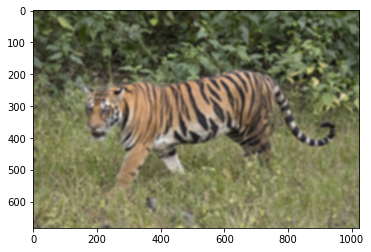

In [123]:
from google.colab.patches import cv2_imshow

blurImg = cv2.blur(np.asarray(resized_im),(10,10)) 
plt.imshow(blurImg) # 출력
rMap=resized_im.load()
portrait=blurImg
pMap=blurImg
cni=0
cnj=0

for i in range(resized_im.size[1]-1):
    for j in range(resized_im.size[0]-1):
      if not seg_map[i][j]==0:
        cni=i
        cnj=j
        pMap[i,j]=rMap[j,i]

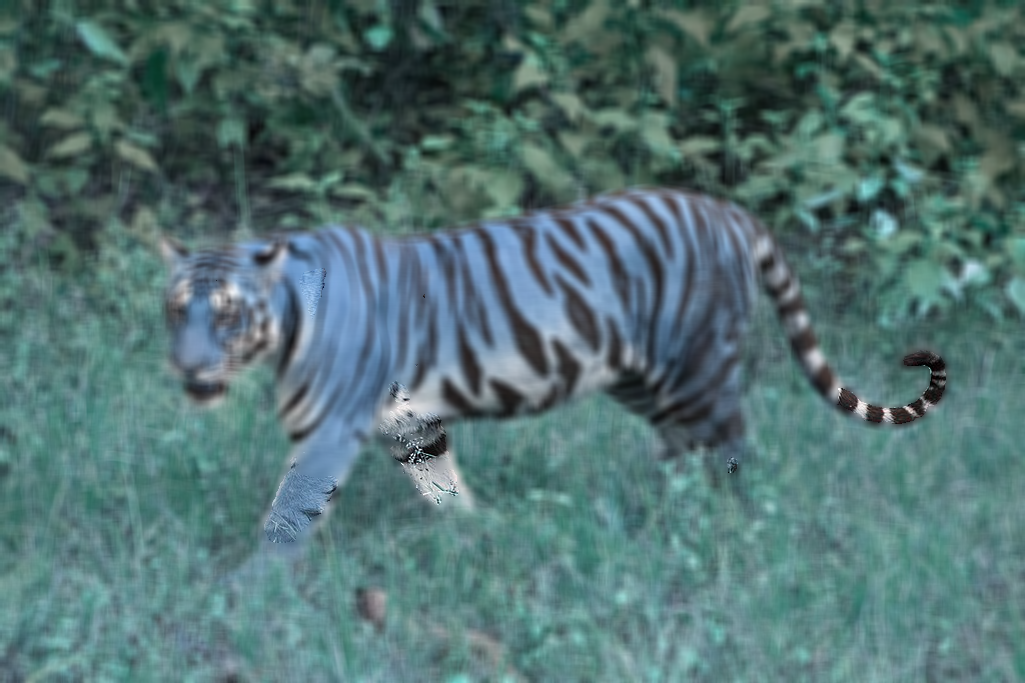

In [124]:
cv2_imshow(pMap)

## Sample 7

In [125]:
# sample3: real flower
SAMPLE_IMAGE = files.upload()


Saving folktiger.jpg to folktiger.jpg


In [126]:
import io
from PIL import Image

def getImage(img):
    path = '/content/gdrive/MyDrive/deeplabmodels/research/deeplab/folktiger.jpg'
    with open(path, 'rb') as f:
        data = f.read()
    data_io = io.BytesIO(data)
    img = Image.open(data_io)
    resized_im, seg_map = run(img)
    return resized_im, seg_map

resized_im, seg_map=getImage(SAMPLE_IMAGE)


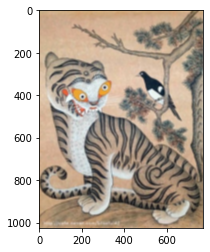

In [127]:
from google.colab.patches import cv2_imshow

blurImg = cv2.blur(np.asarray(resized_im),(10,10)) 
plt.imshow(blurImg) # 출력
rMap=resized_im.load()
portrait=blurImg
pMap=blurImg
cni=0
cnj=0

for i in range(resized_im.size[1]-1):
    for j in range(resized_im.size[0]-1):
      if not seg_map[i][j]==0:
        cni=i
        cnj=j
        pMap[i,j]=rMap[j,i]


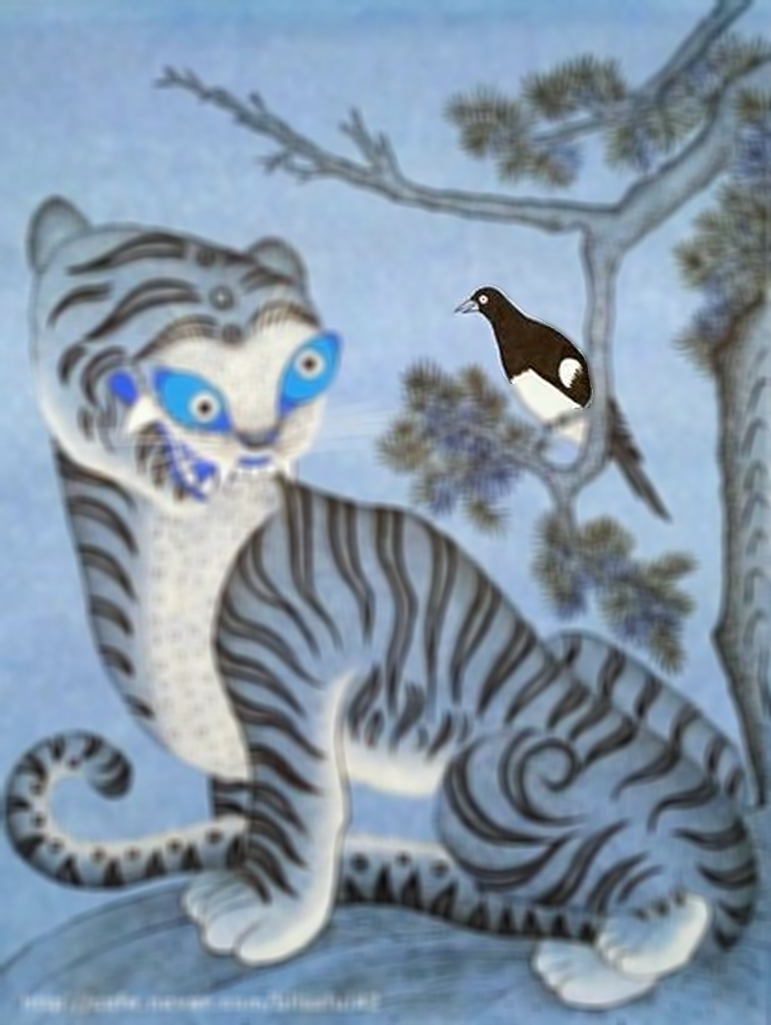

In [128]:
cv2_imshow(pMap)